In [232]:
# import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1 - Exploratory data analysis

In [233]:
# Load files into pandas dataframes
df_logins = pd.read_json("./logins.json")

In [234]:
# Look at contents of df_logins
df_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [235]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [236]:
# Check to see if df_logins has any null or NaN values
df_logins.isna().sum()

login_time    0
dtype: int64

Based on above, df_logins is clean. No null or NaN values that need to be cleaned

In [237]:
df_logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


Based on above, there were 93142 logins. The first one was at 1970-01-01 20:12:16 and last one was at 1970-04-13 18:57:38. It appears that df_logins needs to be sorted.

In [238]:
# Sort df_logins
logins_sorted = sorted(df_logins['login_time'])
logins_sorted

[Timestamp('1970-01-01 20:12:16'),
 Timestamp('1970-01-01 20:13:18'),
 Timestamp('1970-01-01 20:16:10'),
 Timestamp('1970-01-01 20:16:36'),
 Timestamp('1970-01-01 20:16:37'),
 Timestamp('1970-01-01 20:21:41'),
 Timestamp('1970-01-01 20:26:05'),
 Timestamp('1970-01-01 20:26:21'),
 Timestamp('1970-01-01 20:31:03'),
 Timestamp('1970-01-01 20:34:46'),
 Timestamp('1970-01-01 20:34:58'),
 Timestamp('1970-01-01 20:35:38'),
 Timestamp('1970-01-01 20:35:47'),
 Timestamp('1970-01-01 20:36:34'),
 Timestamp('1970-01-01 20:39:25'),
 Timestamp('1970-01-01 20:40:37'),
 Timestamp('1970-01-01 20:43:59'),
 Timestamp('1970-01-01 20:46:34'),
 Timestamp('1970-01-01 20:47:46'),
 Timestamp('1970-01-01 20:47:52'),
 Timestamp('1970-01-01 20:49:12'),
 Timestamp('1970-01-01 20:56:07'),
 Timestamp('1970-01-01 20:59:06'),
 Timestamp('1970-01-01 20:59:59'),
 Timestamp('1970-01-01 21:09:24'),
 Timestamp('1970-01-01 21:15:01'),
 Timestamp('1970-01-01 21:19:24'),
 Timestamp('1970-01-01 21:20:53'),
 Timestamp('1970-01-

In [239]:
#Convert back into dataframe
df_logins_sorted = pd.DataFrame(logins_sorted)
df_logins_sorted.rename(columns={0:"login_time"},inplace=True)
df_logins_sorted.head(10)

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37
5,1970-01-01 20:21:41
6,1970-01-01 20:26:05
7,1970-01-01 20:26:21
8,1970-01-01 20:31:03
9,1970-01-01 20:34:46


In [240]:
# Resample df_logins_sorted at 15min interval so that we can know number of logins every 15 mins
df_logins_15mins = df_logins_sorted.resample('15min',on='login_time').login_time.count()
df_logins_15mins

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
                      ..
1970-04-13 17:45:00    5
1970-04-13 18:00:00    5
1970-04-13 18:15:00    2
1970-04-13 18:30:00    7
1970-04-13 18:45:00    6
Freq: 15T, Name: login_time, Length: 9788, dtype: int64

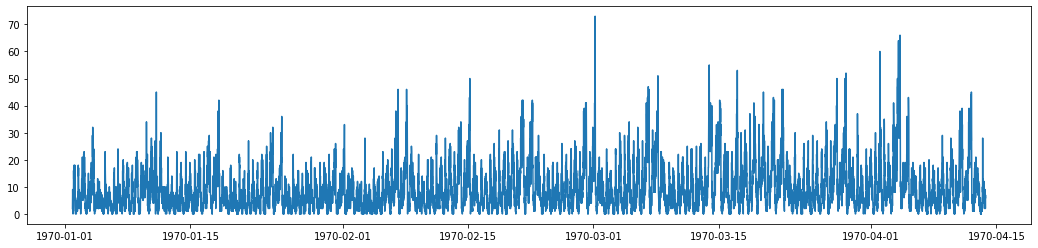

In [241]:
# Look at overall plot of logins every 15mins
plt.figure(figsize=(18,4))
plt.plot(df_logins_15mins)

From plot above, there is a clear weekly trend. Lets look at it more closely

In [298]:
#Loook at how logins vary by weekday
df_logins['wkday']=df_logins['login_time'].dt.day_name() 
df_logins.head()

,login_time,wkday
0,1970-01-01 20:13:18,Thursday
1,1970-01-01 20:16:10,Thursday
2,1970-01-01 20:16:37,Thursday
3,1970-01-01 20:16:36,Thursday
4,1970-01-01 20:26:21,Thursday


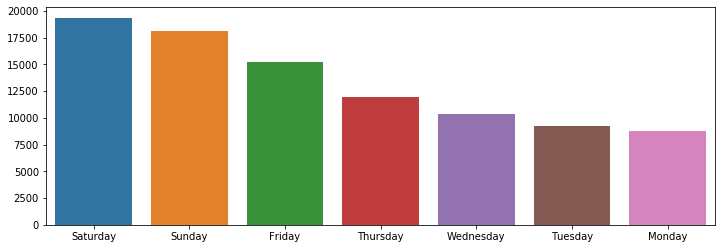

In [313]:
# Logins by wkday
plt.figure(figsize=(12,4))
sns.barplot(x=df_logins['wkday'].value_counts().index, y=df_logins['wkday'].value_counts().values)

From graph above, it is clear that Saturday and Sundays are the days when logins happen the most

In [309]:
# Lets look closer to see what kind of trend is there daily

df_logins['hour'] = df_logins['login_time'].dt.hour
df_logins.head()

,login_time,wkday,hour
0,1970-01-01 20:13:18,Thursday,20
1,1970-01-01 20:16:10,Thursday,20
2,1970-01-01 20:16:37,Thursday,20
3,1970-01-01 20:16:36,Thursday,20
4,1970-01-01 20:26:21,Thursday,20


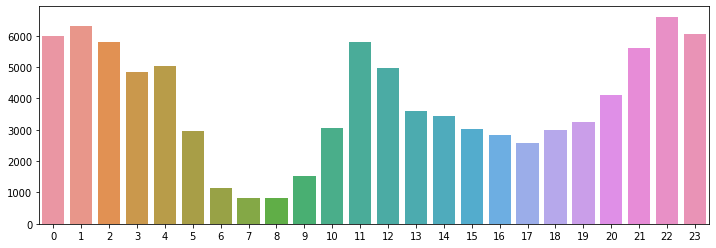

In [314]:
# Logins by hour
plt.figure(figsize=(12,4))
sns.barplot(x=df_logins['hour'].value_counts().index, y=df_logins['hour'].value_counts().values)

From graph above, it is clear that over the course of the day, logins are less around 6am-8am period, start to pick up from 9am onwards, reach a peak around 11am after which it starts to go down till about 5pm after which it starts to pick up again reaching a peak around 10pm after which it tends to stay arond the peack till about 2am after which it starts to go down. 

## Part 2 - Experiment and metrics design

Proposed change/Experiment : Encourage drivers to be in both cities by reimbursing all TOLL costs

1. What would I choose as the key measure of success for this experiment? Why? 

       I would choose "NUmber of cancellations by drivers when they get a ride request from a different city" as key
       measure of success. If the proposed change works, then drivers would be indifferent between the ride requests 
       they get from the city they are currently in vs ride requests they get from a different city and hence the number 
       of cancellations by drivers when they get a ride request from a different city would go down.
  
  
2. Describe a practical experiment to compare effectiveness of proposed change in relation to key meausre of success? 
 
   i) How will I implement the experiment? 
   
       a) Select a group of drivers (say 1000) to whom to offer "reimbursement of TOLL costs" (treatment group)
       b) Select another group of drivers (1000) to whom to offer status quo
       c) Select a time period for which to run the experiment (2 weeks). Over this time period, ensure that both groups
          get about 50% ride requests from city they are in and about 50% ride requests from different city
       d) Observe any difference in number of cancellations between 2 groups
   
   ii) What stats test will I conduct to verify significant of observation? 
   
       Z-test
   
   iii) How would I interpret the results and provide recommendations along with any caveats? 
   
       If the difference in number of cancellations over 2 week time period between 2 groups is statistically significant, 
       then this implies that the proposed change/experiment is effective in changing the behavior of drivers. Hence Iwould
       recommend going ahead with the proposed change for all the drivers

   
   
  
  
 
  






## Part 3 - Predictive Modelling

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

### Data cleaning/wrangling

In [242]:
# Read json file into dataframe
df_ultimate = pd.read_json("./ultimate_data_challenge.json")

In [243]:
# Look at dataframe
df_ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [244]:
df_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [245]:
# Check to see if any nulls or NaNs
df_ultimate.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

Based on above:

i) Three columns (avg_rating_of_driver, phone and avg_rating_by_driver) have null or NaN values that need to be treated.

In [246]:
# Clean the dataset by dropping nulls/NaNs
df_ultimate_clean = df_ultimate.dropna(subset=["avg_rating_of_driver","phone","avg_rating_by_driver"])
df_ultimate_clean.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

BAsed on above, dataset is now clean

In [247]:
len(df_ultimate) - len(df_ultimate_clean)

8555

Removed 8555 rows out of a total of 50K rows (about 17%)

### Data exploration

In [248]:
# Look at summary stats of the clean dataset
df_ultimate_clean.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,2.609675,4.601720,1.073822,8.898709,61.254897,5.460046,4.776446
std,4.059336,0.616104,0.198747,18.322061,34.813848,5.145174,0.404606
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,37.500000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.780000,5.000000
75%,3.000000,5.000000,1.070000,11.100000,100.000000,6.490000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,79.690000,5.000000


Based on min and max values above, most columns seem to have reasonable values. Lets look at distribution of trips_in_first_30_days, avg_surge and avg_dist since their max values seem much higher than their corresponding average values

(array([3.8876e+04, 1.9030e+03, 4.6100e+02, 1.3300e+02, 3.8000e+01,
        1.9000e+01, 1.1000e+01, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.        ,   8.33333333,  16.66666667,  25.        ,
         33.33333333,  41.66666667,  50.        ,  58.33333333,
         66.66666667,  75.        ,  83.33333333,  91.66666667,
        100.        , 108.33333333, 116.66666667, 125.        ]),
 <a list of 15 Patch objects>)

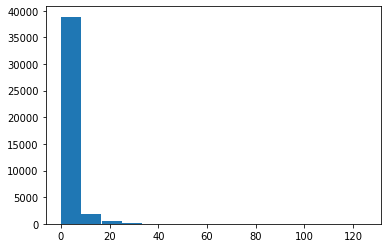

In [249]:
# Look at distribution of trips_in_first_30_days
plt.hist(df_ultimate_clean['trips_in_first_30_days'],bins=15)

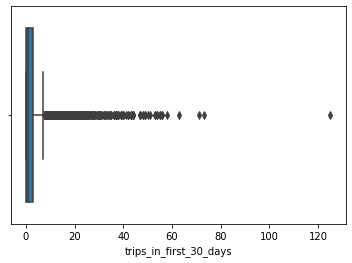

In [250]:
# Look at boxplot of the same
sns.boxplot(df_ultimate_clean['trips_in_first_30_days'])

(array([3.9939e+04, 1.0480e+03, 2.8000e+02, 1.0200e+02, 5.7000e+01,
        7.0000e+00, 6.0000e+00, 1.0000e+00, 3.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.        , 1.46666667, 1.93333333, 2.4       , 2.86666667,
        3.33333333, 3.8       , 4.26666667, 4.73333333, 5.2       ,
        5.66666667, 6.13333333, 6.6       , 7.06666667, 7.53333333,
        8.        ]),
 <a list of 15 Patch objects>)

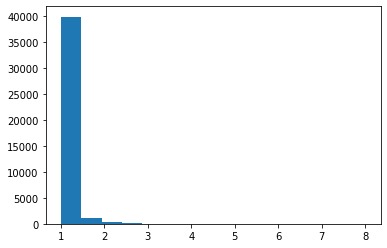

In [251]:
# Look at distribution for avg_surge
plt.hist(df_ultimate_clean['avg_surge'], bins=15)

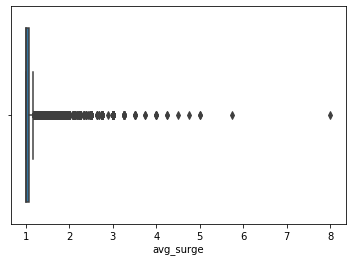

In [252]:
# Look at boxplot of the same
sns.boxplot(df_ultimate_clean['avg_surge'])

(array([2.7775e+04, 8.8180e+03, 2.9740e+03, 1.1550e+03, 3.6500e+02,
        1.7500e+02, 9.9000e+01, 3.4000e+01, 2.3000e+01, 1.0000e+01,
        6.0000e+00, 4.0000e+00, 0.0000e+00, 4.0000e+00, 3.0000e+00]),
 array([ 0.        ,  5.31266667, 10.62533333, 15.938     , 21.25066667,
        26.56333333, 31.876     , 37.18866667, 42.50133333, 47.814     ,
        53.12666667, 58.43933333, 63.752     , 69.06466667, 74.37733333,
        79.69      ]),
 <a list of 15 Patch objects>)

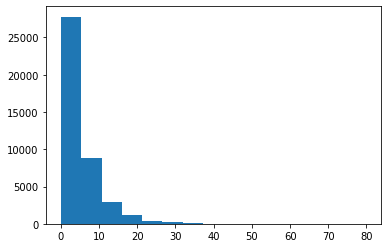

In [253]:
# Look at distribution for avg_dist
plt.hist(df_ultimate_clean['avg_dist'],bins=15)

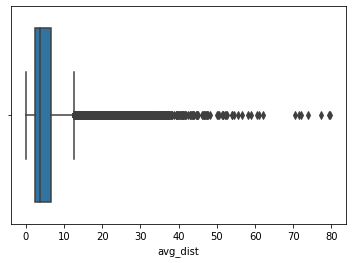

In [254]:
# Look at boxplot of the same
sns.boxplot(df_ultimate_clean['avg_dist'])

From results above (particularly the boxplots), it appears that there are values that could potentially be considered outliers. However, for this project, I have decided to leave them as they are assuming that they are valid values and models need to account for them even though they might seem off. 

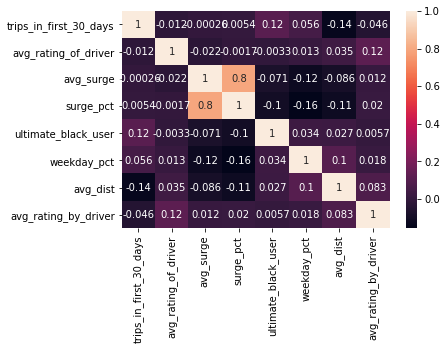

In [255]:
# Look at heatmap to check for any correlation amongst numerical independent variables
sns.heatmap(df_ultimate_clean.corr(),annot=True)

From results above, avg_surge and surge_pct have correlation of 0.8 (80%) which is pretty high. This suggests that potentially only one of them should be used vs both of them for modelling purposes. 

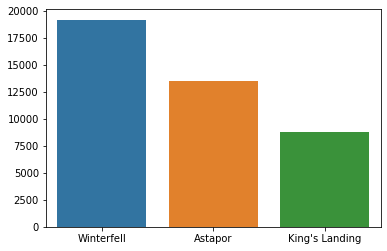

In [256]:
# Look at distribution of categorical vaiables and date variables 
sns.barplot(x = df_ultimate_clean['city'].value_counts().index, y=df_ultimate_clean['city'].value_counts().values)

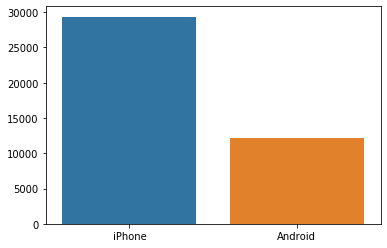

In [257]:
sns.barplot(x = df_ultimate_clean['phone'].value_counts().index, y=df_ultimate_clean['phone'].value_counts().values)

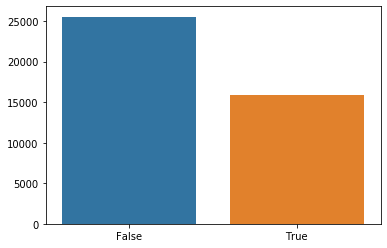

In [258]:
sns.barplot(x = df_ultimate_clean['ultimate_black_user'].value_counts().index, y=df_ultimate_clean['ultimate_black_user'].value_counts().values)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

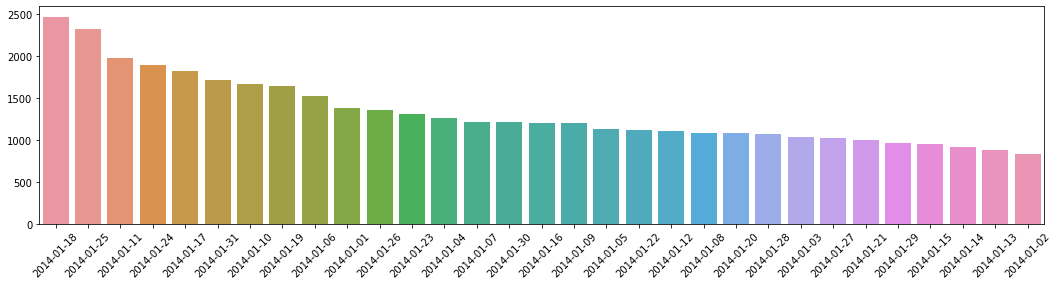

In [259]:
plt.figure(figsize=(18,4))
sns.barplot(x = df_ultimate_clean['signup_date'].value_counts().index, y= df_ultimate_clean['signup_date'].value_counts().values)
plt.xticks(rotation=45)

In [260]:
df_ultimate_clean['last_trip_date'].value_counts()

2014-06-29    1924
2014-06-28    1583
2014-06-30    1362
2014-06-27    1029
2014-06-22     934
              ... 
2014-02-24      58
2014-02-26      56
2014-03-04      54
2014-02-20      54
2014-03-10      52
Name: last_trip_date, Length: 182, dtype: int64

From results above, all categorical variables and date variables look good and they can be left as they are

### i) Find fraction of observed users that were retained

In [261]:
df_ultimate_clean.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [262]:
# Both signup_date and last_trip_date are in "string" format, Convert them to proper datetime format
df_ultimate_clean['last_trip_date'] = pd.to_datetime(df_ultimate_clean['last_trip_date'])
df_ultimate_clean['signup_date'] = pd.to_datetime(df_ultimate_clean['signup_date'])


C:\Users\sanjiv\Anaconda3-2020\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sanjiv\Anaconda3-2020\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [263]:
# Find maximum value for "last_trip_date" . This will be used to decide whether a user is considered "retained" or not.
# A user is considered "retained" if they have taken a trip within the preceding 30 days (preceding from 
# max_last_trip_date)

max_last_trip_date = max(df_ultimate_clean.last_trip_date)
print("max_last_trip_date: ", max_last_trip_date)

print("Fraction of users that were retained: ", 
      df_ultimate_clean[df_ultimate_clean['last_trip_date']>='2014-06-01']['last_trip_date'].count()
      /len(df_ultimate_clean['last_trip_date']))

max_last_trip_date:  2014-07-01 00:00:00
Fraction of users that were retained:  0.41102666184099407


About 41.1% of users are retained. Overall, its a balanced dataset where there's about somewhat equal proportion of positive classes and negative classes

### 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In [264]:
# Add "retained" column to indicate whether user was  retained or not. User is retained if they have taken 
# a trip within the preceding 30 days (preceding from max_last_trip_date)

df_ultimate_clean['retained'] = np.nan
df_ultimate_clean.loc[df_ultimate_clean['last_trip_date'] >= '2014-06-01','retained'] = 1
df_ultimate_clean.loc[df_ultimate_clean['last_trip_date'] < '2014-06-01','retained'] = 0
df_ultimate_clean.head()

C:\Users\sanjiv\Anaconda3-2020\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\sanjiv\Anaconda3-2020\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1.0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0.0


In [265]:
# Ged rid of "last_trip_date" column since it is now redundant. Target feature "retained" has been built based on it
df_ultimate_clean.drop('last_trip_date',axis=1, inplace=True)
df_ultimate_clean.head()

C:\Users\sanjiv\Anaconda3-2020\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1.0
1,Astapor,0,2014-01-29,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0.0
2,Astapor,3,2014-01-06,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0.0
3,King's Landing,9,2014-01-10,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1.0
4,Winterfell,14,2014-01-27,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0.0


In [266]:
# Add a column "days_since_signup" based on column "signup_date".
df_ultimate_clean['days_since_signup'] = np.nan
df_ultimate_clean['days_since_signup'] = (max_last_trip_date - df_ultimate_clean['signup_date']).dt.days
df_ultimate_clean.head()

C:\Users\sanjiv\Anaconda3-2020\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sanjiv\Anaconda3-2020\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,days_since_signup
0,King's Landing,4,2014-01-25,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1.0,157
1,Astapor,0,2014-01-29,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0.0,153
2,Astapor,3,2014-01-06,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0.0,176
3,King's Landing,9,2014-01-10,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1.0,172
4,Winterfell,14,2014-01-27,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0.0,155


In [268]:
# Drop "signup_date" column since a column "days_since_signup" has been added
df_ultimate_clean.drop('signup_date',axis=1, inplace=True)
df_ultimate_clean.head()

C:\Users\sanjiv\Anaconda3-2020\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,days_since_signup
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1.0,157
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0.0,153
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0.0,176
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1.0,172
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0.0,155


In [278]:
# Now deal with categorical variables

# Do onehot encoding for categorical variables
df_ultimate_encoded = pd.get_dummies(df_ultimate_clean, columns = ['city', 'phone', 'ultimate_black_user'])
df_ultimate_encoded.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,days_since_signup,city_Astapor,city_King's Landing,city_Winterfell,phone_0,phone_1,ultimate_black_user_False,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1.0,157,0,1,0,0,1,0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0.0,153,1,0,0,1,0,1,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0.0,176,1,0,0,0,1,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1.0,172,0,1,0,0,1,0,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0.0,155,0,0,1,1,0,1,0


The dataset above is ready for modelling since all the columns are now of numerical type

In [280]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
df_ultimate_encoded.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'retained', 'days_since_signup', 'city_Astapor', 'city_King's Landing',
       'city_Winterfell', 'phone_0', 'phone_1', 'ultimate_black_user_False',
       'ultimate_black_user_True'],
      dtype='object')

In [284]:
x = df_ultimate_encoded[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge','surge_pct', 
                         'weekday_pct', 'avg_dist', 'avg_rating_by_driver','days_since_signup', 'city_Astapor', 
                         "city_King's Landing",'city_Winterfell', 'phone_0', 'phone_1', 'ultimate_black_user_False',
                         'ultimate_black_user_True']]
y = df_ultimate_encoded['retained']
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

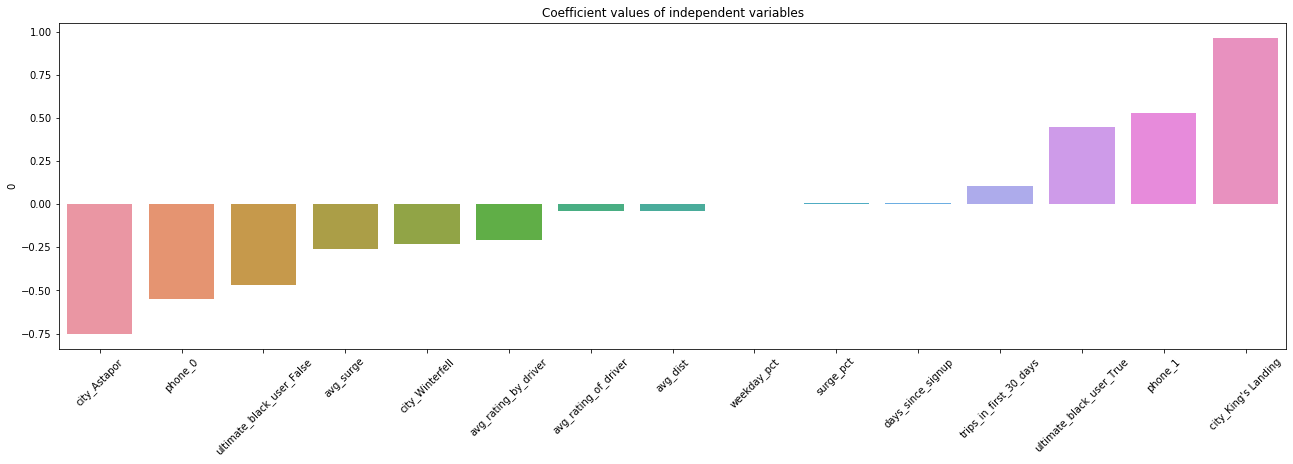

In [285]:
# Assess the relative importance of features by using logistic regression and looking at coefficients of 
# features/independent variables
from sklearn.linear_model import LogisticRegression

classifier_logistic = LogisticRegression(solver='liblinear')
classifier_logistic.fit(x_train, y_train)

df_coefs = pd.DataFrame(np.round(classifier_logistic.coef_[0], 3))
df_coefs.index = x_train.columns
df_coefs_sorted = df_coefs.sort_values(by=0)

plt.figure(figsize=(22,6))
sns.barplot(x=df_coefs_sorted.index, y=df_coefs_sorted[0])
plt.title("Coefficient values of independent variables")
plt.xticks(rotation=45)

In [287]:
# Look at coefficients with large negative values
df_coefs_sorted[(df_coefs_sorted[0]<=-0.4)]

,0
city_Astapor,-0.755
phone_0,-0.551
ultimate_black_user_False,-0.468


In [288]:
# Look at coefficients with large positive values
df_coefs_sorted[(df_coefs_sorted[0]>=0.4)]

,0
ultimate_black_user_True,0.448
phone_1,0.530
city_King's Landing,0.963


Based on results above, "city", "phone" and "ultimate_black_user" seem to have most impact on the target variable "retained". Among the cities, city_Astaphor and city_King's_Landing seem to have more impact that city_Winterfell

In [289]:
# Now try with 3 models - Logistic regression, Random Forest and Graident Boost

Accuracy Score:
0.7027385691880806 

Confusion Matrix:
[[3944  879]
 [1585 1881]] 

Classification Report
              precision    recall  f1-score   support

         0.0       0.71      0.82      0.76      4823
         1.0       0.68      0.54      0.60      3466

    accuracy                           0.70      8289
   macro avg       0.70      0.68      0.68      8289
weighted avg       0.70      0.70      0.70      8289
 

Area under curve for ROC :  0.7546846179329929
Area under curve for Precision Recall :  0.6869656499791689


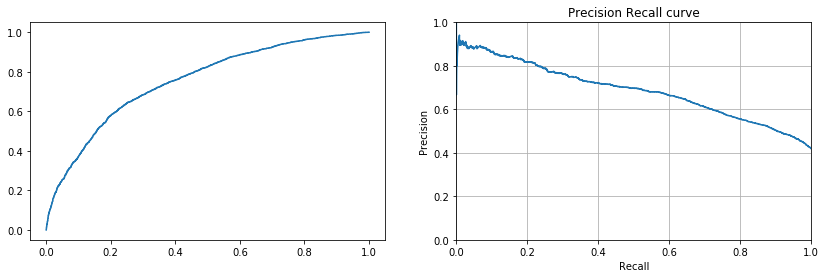

In [293]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc

classifier_logistic = LogisticRegression(solver='liblinear')
classifier_logistic.fit(x_train, y_train)

y_predicted = classifier_logistic.predict(x_test)

#Accuracy score
print("Accuracy Score:")
print(accuracy_score(y_predicted,y_test),"\n")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predicted),"\n")

# Classification report
print("Classification Report")
print(classification_report(y_test, y_predicted),"\n")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

# Look at ROC curve and its AUC (area under curve)
# Use predicted probabilities, not predicted label/class for roc_curve method
y_predicted_prob_logistic = classifier_logistic.predict_proba(x_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted_prob_logistic[:,1])

ax1.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

print("Area under curve for ROC : ", metrics.roc_auc_score(y_test, y_predicted_prob_logistic[:,1]))

# Look at Precision Recall curve and its AUC (area under curve)
precision, recall, thresholds1 = metrics.precision_recall_curve(y_test, y_predicted_prob_logistic[:,1])

ax2.plot(recall, precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Precision Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

print("Area under curve for Precision Recall : ", auc(recall, precision))

Accuracy Score:
0.756786102062975 

Confusion Matrix:
[[3948  875]
 [1141 2325]] 

Classification Report
              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80      4823
         1.0       0.73      0.67      0.70      3466

    accuracy                           0.76      8289
   macro avg       0.75      0.74      0.75      8289
weighted avg       0.76      0.76      0.76      8289
 

Area under curve for ROC :  0.8289280100078258
Area under curve for Precision Recall :  0.7833535307898518


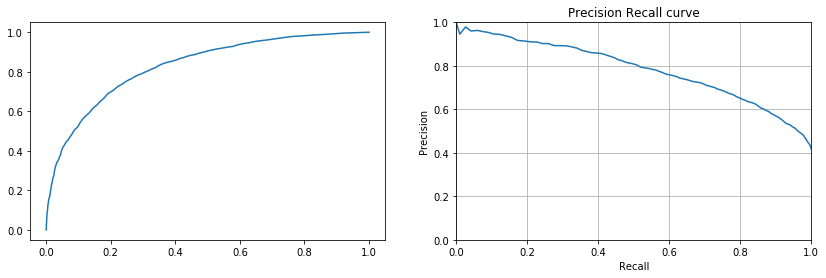

In [295]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc

classifier_randomforest = RandomForestClassifier(random_state=0)
classifier_randomforest.fit(x_train,y_train)

y_predicted = classifier_randomforest.predict(x_test)

#Accuracy score
print("Accuracy Score:")
print(accuracy_score(y_predicted,y_test),"\n")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predicted),"\n")

# Classification report
print("Classification Report")
print(classification_report(y_test, y_predicted),"\n")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

# Look at ROC curve and its AUC (area under curve)
# Use predicted probabilities, not predicted label/class for roc_curve method
y_predicted_prob_logistic = classifier_randomforest.predict_proba(x_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted_prob_logistic[:,1])

ax1.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

print("Area under curve for ROC : ", metrics.roc_auc_score(y_test, y_predicted_prob_logistic[:,1]))

# Look at Precision Recall curve and its AUC (area under curve)
precision, recall, thresholds1 = metrics.precision_recall_curve(y_test, y_predicted_prob_logistic[:,1])

ax2.plot(recall, precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Precision Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

print("Area under curve for Precision Recall : ", auc(recall, precision))


Accuracy Score:
0.7740378815297382 

Confusion Matrix:
[[4014  809]
 [1064 2402]] 

Classification Report
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81      4823
         1.0       0.75      0.69      0.72      3466

    accuracy                           0.77      8289
   macro avg       0.77      0.76      0.77      8289
weighted avg       0.77      0.77      0.77      8289
 

Area under curve for ROC :  0.8492512017155724
Area under curve for Precision Recall :  0.8032422117700615


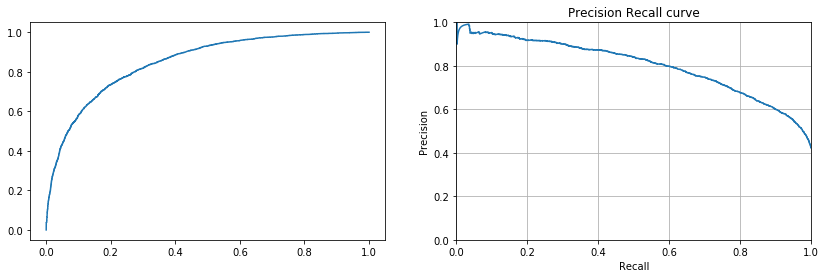

In [296]:
# Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc

classifier_gradientboost = GradientBoostingClassifier(random_state=0)
classifier_gradientboost.fit(x_train, y_train)

y_predicted = classifier_gradientboost.predict(x_test)

#Accuracy score
print("Accuracy Score:")
print(accuracy_score(y_predicted,y_test),"\n")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predicted),"\n")

# Classification report
print("Classification Report")
print(classification_report(y_test, y_predicted),"\n")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

# Look at ROC curve and its AUC (area under curve)
# Use predicted probabilities, not predicted label/class for roc_curve method
y_predicted_prob_logistic = classifier_gradientboost.predict_proba(x_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted_prob_logistic[:,1])

ax1.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

print("Area under curve for ROC : ", metrics.roc_auc_score(y_test, y_predicted_prob_logistic[:,1]))

# Look at Precision Recall curve and its AUC (area under curve)
precision, recall, thresholds1 = metrics.precision_recall_curve(y_test, y_predicted_prob_logistic[:,1])

ax2.plot(recall, precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Precision Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

print("Area under curve for Precision Recall : ", auc(recall, precision))



Discussion of results:

 Three different models were utilized (Logistic regression, random forest and gradient boost) with default parameters to predict which users would be retained 6 months later. Numerous metrics were used to evaluate the three models (accuracy score, confusion matrix, classification report i.e. F1-score and areas under ROC and precision recall curves) in order to 
assess which model would do the best job in predicting users that would be retained 6 months later. 
 
 Accuracy Score:
 i) Logistic : 0.702
 ii) Random forest : 0.756
 iii) Gradient Boost : 0.774
 
 F1-score:
 i) Logistic : 0.68
 ii) Random forest: 0.75
 iii) Gradient Boost: 0.77
 
 Area under ROC curve:
 i) Logistic : 0.754
 ii) Random Forest: 0.828
 iii) Gradient Boost: 0.849
 
  From results above, gradient boost model has the best performance in test data when evaluated under different metrics.  So I would recommend predictions made by gradient boost model. 
  
  I would consider the model (gradient boost model) valid for this data since F1-score is in the range of 77% and Area
  under ROC curve is in range of 85%. 


### 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

One of the key insights revealed from feature importance process was that city, phone and ultimate_black_user are the three
features/independent variables that have the most impact on the target variable/independent variable "retained" . This would 
suggest that in order to improve its lonterm rider retention, Ultimate should prioritize/focus its signup efforts on specific 
cities (Kings Landing in particular) , iphone users and Ultimate Black users. 
